In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy  as np


In [ ]:
!pip install scikit-learn feature-engine

In [ ]:
import sklearn.preprocessing
from feature_engine.outliers import winsorizer

In [ ]:
df= pd.read_csv('Machine Downtime.csv', encoding='latin-1')

In [ ]:
df.shape

In [ ]:
df.info()

In [35]:
df.head()

Date            Machine_ID Assembly_Line_No  Hydraulic_Pressure(bar)  \
0  31-12-2021  Makino-L1-Unit1-2013     Shopfloor-L1                    71.04   
1  31-12-2021  Makino-L1-Unit1-2013     Shopfloor-L1                   125.33   
2  31-12-2021  Makino-L3-Unit1-2015     Shopfloor-L3                    71.12   
3  31-05-2022  Makino-L2-Unit1-2015     Shopfloor-L2                   139.34   
4  31-03-2022  Makino-L1-Unit1-2013     Shopfloor-L1                    60.51   

   Coolant_Pressure(bar)  Air_System_Pressure(bar)  Coolant_Temperature  \
0               6.933725                  6.284965                 25.6   
1               4.936892                  6.196733                 35.3   
2               6.839413                  6.655448                 13.1   
3               4.574382                  6.560394                 24.4   
4               6.893182                  6.141238                  4.1   

   Hydraulic_Oil_Temperature  Spindle_Bearing_Temperature  Spindle_Vibration  \
0                       46.0                         33.4              1.291   
1                       47.4                         34.6              1.382   
2                       40.7                         33.0              1.319   
3                       44.2                         40.6              0.618   
4                       47.3                         31.4              0.983   

   Tool_Vibration  Spindle_Speed(RPM)  Voltage(volts)  Torque(Nm)  \
0          26.492             25892.0           335.0   24.055326   
1          25.274             19856.0           368.0   14.202890   
2          30.608             19851.0           325.0   24.049267   
3          30.791             18461.0           360.0   25.860029   
4          25.516             26526.0           354.0   25.515874   

   Cutting(kN)         Downtime  
0         3.58  Machine_Failure  
1         2.68  Machine_Failure  
2         3.55  Machine_Failure  
3         3.55  Machine_Failure  
4         3.55  Machine_Failure

In [36]:
df.describe()

Hydraulic_Pressure(bar)  Coolant_Pressure(bar)  \
count              2490.000000            2481.000000   
mean                101.409084               4.947058   
std                  30.289301               0.997357   
min                 -14.326454               0.325000   
25%                  76.355000               4.462464   
50%                  96.763486               4.939960   
75%                 126.415727               5.518401   
max                 191.000000              11.350000   

       Air_System_Pressure(bar)  Coolant_Temperature  \
count               2483.000000          2488.000000   
mean                   6.499275            18.559887   
std                    0.407279             8.554480   
min                    5.063480             4.100000   
25%                    6.217987            10.400000   
50%                    6.505191            21.200000   
75%                    6.780550            25.600000   
max                    7.973992            98.200000   

       Hydraulic_Oil_Temperature  Spindle_Bearing_Temperature  \
count                2484.000000                  2493.000000   
mean                   47.618317                    35.063698   
std                     3.768674                     3.764823   
min                    35.200000                    22.600000   
25%                    45.100000                    32.500000   
50%                    47.700000                    35.100000   
75%                    50.100000                    37.600000   
max                    61.400000                    49.500000   

       Spindle_Vibration  Tool_Vibration  Spindle_Speed(RPM)  Voltage(volts)  \
count        2489.000000     2489.000000         2494.000000     2494.000000   
mean            1.009334       25.411975        20274.792302      348.996792   
std             0.342898        6.437142         3852.660056       45.376024   
min            -0.461000        2.161000            0.000000      202.000000   
25%             0.777000       21.089000        17919.000000      319.000000   
50%             1.008000       25.455000        20137.500000      349.000000   
75%             1.236000       29.790000        22501.750000      380.000000   
max             2.000000       45.726000        27957.000000      479.000000   

        Torque(Nm)  Cutting(kN)  
count  2479.000000  2493.000000  
mean     25.234968     2.782551  
std       6.138564     0.616688  
min       0.000000     1.800000  
25%      21.666115     2.250000  
50%      24.647736     2.780000  
75%      30.514008     3.270000  
max      55.552400     3.930000

**Exploratory** **Data** **Analysis**

**Missing Data**

In [37]:
df.isnull()

Date  Machine_ID  Assembly_Line_No  Hydraulic_Pressure(bar)  \
0     False       False             False                    False   
1     False       False             False                    False   
2     False       False             False                    False   
3     False       False             False                    False   
4     False       False             False                    False   
...     ...         ...               ...                      ...   
2495  False       False             False                    False   
2496  False       False             False                    False   
2497  False       False             False                    False   
2498  False       False             False                    False   
2499  False       False             False                    False   

      Coolant_Pressure(bar)  Air_System_Pressure(bar)  Coolant_Temperature  \
0                     False                     False                False   
1                     False                     False                False   
2                     False                     False                False   
3                     False                     False                False   
4                     False                     False                False   
...                     ...                       ...                  ...   
2495                  False                     False                False   
2496                  False                     False                False   
2497                  False                     False                False   
2498                  False                     False                False   
2499                  False                     False                False   

      Hydraulic_Oil_Temperature  Spindle_Bearing_Temperature  \
0                         False                        False   
1                         False                        False   
2                         False                        False   
3                         False                        False   
4                         False                        False   
...                         ...                          ...   
2495                      False                        False   
2496                      False                        False   
2497                      False                        False   
2498                      False                        False   
2499                      False                        False   

      Spindle_Vibration  Tool_Vibration  Spindle_Speed(RPM)  Voltage(volts)  \
0                 False           False               False           False   
1                 False           False               False           False   
2                 False           False               False           False   
3                 False           False               False           False   
4                 False           False               False           False   
...                 ...             ...                 ...             ...   
2495              False           False               False           False   
2496              False           False               False           False   
2497              False           False               False           False   
2498              False           False               False           False   
2499              False           False               False           False   

      Torque(Nm)  Cutting(kN)  Downtime  
0          False        False     False  
1          False        False     False  
2          False        False     False  
3          False        False     False  
4          False        False     False  
...          ...          ...       ...  
2495       False        False     False  
2496       False        False     False  
2497       False         True     False  
2498       False        False     False  
2499       False        False     False  

[2500 

In [38]:
null_count = df.isnull().sum()
print(null_count)

Date                            0
Machine_ID                      0
Assembly_Line_No                0
Hydraulic_Pressure(bar)        10
Coolant_Pressure(bar)          19
Air_System_Pressure(bar)       17
Coolant_Temperature            12
Hydraulic_Oil_Temperature      16
Spindle_Bearing_Temperature     7
Spindle_Vibration              11
Tool_Vibration                 11
Spindle_Speed(RPM)              6
Voltage(volts)                  6
Torque(Nm)                     21
Cutting(kN)                     7
Downtime                        0
dtype: int64


<Axes: >

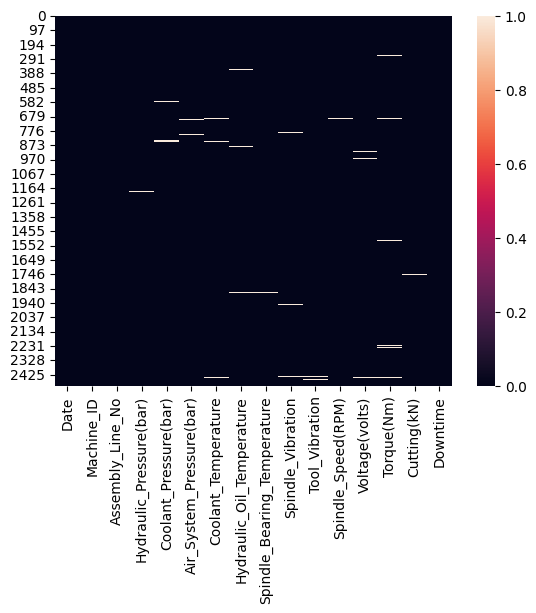

In [39]:
sns.heatmap(df.isnull())

In [40]:
df = df.fillna(df.mean())
print(df)

            Date            Machine_ID Assembly_Line_No  \
0     31-12-2021  Makino-L1-Unit1-2013     Shopfloor-L1   
1     31-12-2021  Makino-L1-Unit1-2013     Shopfloor-L1   
2     31-12-2021  Makino-L3-Unit1-2015     Shopfloor-L3   
3     31-05-2022  Makino-L2-Unit1-2015     Shopfloor-L2   
4     31-03-2022  Makino-L1-Unit1-2013     Shopfloor-L1   
...          ...                   ...              ...   
2495  01-02-2022  Makino-L1-Unit1-2013     Shopfloor-L1   
2496  01-02-2022  Makino-L1-Unit1-2013     Shopfloor-L1   
2497  01-02-2022  Makino-L2-Unit1-2015     Shopfloor-L2   
2498  01-02-2022  Makino-L3-Unit1-2015     Shopfloor-L3   
2499  01-02-2022  Makino-L2-Unit1-2015     Shopfloor-L2   

      Hydraulic_Pressure(bar)  Coolant_Pressure(bar)  \
0                   71.040000               6.933725   
1                  125.330000               4.936892   
2                   71.120000               6.839413   
3                  139.340000               4.574382   
4          

<ipython-input-40-8a0446905b17>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


In [41]:
# Count the number of null values in each column
null_count = df.isnull().sum()

# Print the number of null values in each column
print(null_count)


Date                           0
Machine_ID                     0
Assembly_Line_No               0
Hydraulic_Pressure(bar)        0
Coolant_Pressure(bar)          0
Air_System_Pressure(bar)       0
Coolant_Temperature            0
Hydraulic_Oil_Temperature      0
Spindle_Bearing_Temperature    0
Spindle_Vibration              0
Tool_Vibration                 0
Spindle_Speed(RPM)             0
Voltage(volts)                 0
Torque(Nm)                     0
Cutting(kN)                    0
Downtime                       0
dtype: int64


**Now no null values are present in the dataset**

In [42]:
from sklearn.preprocessing import LabelEncoder
# Identify the categorical columns
categorical_columns = ['Machine_ID', 'Assembly_Line_No', 'Downtime']

# Create a LabelEncoder object for each categorical column
label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()

# Fit the LabelEncoder objects to the data
for column in categorical_columns:
    label_encoders[column].fit(df[column])

# Transform the categorical columns to numerical columns
for column in categorical_columns:
    df[column] = label_encoders[column].transform(df[column])

# Save the transformed dataset
df.to_csv('transformed.csv', index=False)



1.   Makino-L1-Unit1-2013 = 0
2.   Makino-L3-Unit1-2015 = 1
3.   Makino-L2-Unit1-2015 = 2



1. shopfloor L1 = 0
2. shopfloor L2 = 1
3. shopfloor L3 = 2


1. Machine failure = 0
2. no_Machine failure = 1


In [43]:

# Identify the numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate the interquartile range (IQR) for each numerical column
IQRs = {}
for column in numerical_columns:
    IQRs[column] = df[column].quantile(0.75) - df[column].quantile(0.25)

# Calculate the lower and upper bounds for each numerical column
lower_bounds = {}
upper_bounds = {}
for column in numerical_columns:
    lower_bounds[column] = df[column].quantile(0.25) - 1.5 * IQRs[column]
    upper_bounds[column] = df[column].quantile(0.75) + 1.5 * IQRs[column]

# Identify the outliers in each numerical column
outliers = {}
for column in numerical_columns:
    outliers[column] = df[column][(df[column] < lower_bounds[column]) | (df[column] > upper_bounds[column])]

# Print the outliers
for column in numerical_columns:
    print(f'Outliers in {column}: {outliers[column]}')


Outliers in Machine_ID: Series([], Name: Machine_ID, dtype: int64)
Outliers in Assembly_Line_No: Series([], Name: Assembly_Line_No, dtype: int64)
Outliers in Hydraulic_Pressure(bar): 2058   -14.326454
Name: Hydraulic_Pressure(bar), dtype: float64
Outliers in Coolant_Pressure(bar): 851    11.350
853    11.300
913     0.325
Name: Coolant_Pressure(bar), dtype: float64
Outliers in Air_System_Pressure(bar): 125     5.091411
674     5.063480
739     7.971607
800     7.804750
950     5.366875
1135    7.712441
1190    7.973992
1659    7.781151
1910    5.329777
1958    7.620960
2101    5.151876
2102    5.305506
2147    7.644786
2280    5.283833
Name: Air_System_Pressure(bar), dtype: float64
Outliers in Coolant_Temperature: 1035    98.2
Name: Coolant_Temperature, dtype: float64
Outliers in Hydraulic_Oil_Temperature: 127     37.1
337     57.9
375     36.4
534     59.5
588     61.4
597     37.4
614     59.2
724     36.9
825     35.2
1002    60.3
1231    37.5
1265    58.1
1342    59.5
1536    36.2


In [44]:

from scipy.stats import mode

# Identify the numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate the mode for each numerical column
modes = {}
for column in numerical_columns:
    modes[column] = mode(df[column])[0]

# Replace the outliers with the mode
for column in numerical_columns:
    df[column].replace(to_replace=[np.nan, -np.inf, np.inf], value=modes[column], inplace=True)

# Save the transformed dataset
df.to_csv('dataset_transformed.csv', index=False)

In [45]:
from sklearn.preprocessing import MinMaxScaler
# Identify the numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the data
scaler.fit(df[numerical_columns])

# Transform the data using the scaler
normalized_data = scaler.transform(df[numerical_columns])

# Save the normalized data
df[numerical_columns] = normalized_data

# Save the transformed dataset
df.to_csv('dataset_normalized.csv', index=False)





In [46]:
# *** 1st business moment ***
print(df.mean())
print('\n')
print(df.median())
print('\n')
print(df.mode())
print('\n')

Machine_ID                     0.488800
Assembly_Line_No               0.488800
Hydraulic_Pressure(bar)        0.563666
Coolant_Pressure(bar)          0.419234
Air_System_Pressure(bar)       0.493313
Coolant_Temperature            0.153665
Hydraulic_Oil_Temperature      0.473982
Spindle_Bearing_Temperature    0.463335
Spindle_Vibration              0.597454
Tool_Vibration                 0.533708
Spindle_Speed(RPM)             0.725213
Voltage(volts)                 0.530674
Torque(Nm)                     0.454255
Cutting(kN)                    0.461292
Downtime                       0.494000
dtype: float64


Machine_ID                     0.500000
Assembly_Line_No               0.500000
Hydraulic_Pressure(bar)        0.542119
Coolant_Pressure(bar)          0.419234
Air_System_Pressure(bar)       0.494587
Coolant_Temperature            0.180659
Hydraulic_Oil_Temperature      0.473982
Spindle_Bearing_Temperature    0.464684
Spindle_Vibration              0.597454
Tool_Vibration         

<ipython-input-46-ee270b40bbb8>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.mean())
<ipython-input-46-ee270b40bbb8>:4: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.median())


In [91]:
# ***2nd Moment Business Decision(Measures of Dispersion)***

print(df.var())
print('\n')
print(df.std())

Hydraulic_Pressure(bar)             9.174417e+02
Coolant_Pressure(bar)               9.947213e-01
Air_System_Pressure(bar)            1.658765e-01
Coolant_Temperature                 7.317912e+01
Hydraulic_Oil_Temperature(Â°C)      1.420291e+01
Spindle_Bearing_Temperature(Â°C)    1.417389e+01
Spindle_Vibration(Âµm)              1.175791e-01
Tool_Vibration(Âµm)                 4.143679e+01
Spindle_Speed(RPM)                  1.484299e+07
Voltage(volts)                      2.058984e+03
Torque(Nm)                          3.768196e+01
Cutting(kN)                         3.803044e-01
dtype: float64


Hydraulic_Pressure(bar)               30.289301
Coolant_Pressure(bar)                  0.997357
Air_System_Pressure(bar)               0.407279
Coolant_Temperature                    8.554480
Hydraulic_Oil_Temperature(Â°C)         3.768674
Spindle_Bearing_Temperature(Â°C)       3.764823
Spindle_Vibration(Âµm)                 0.342898
Tool_Vibration(Âµm)                    6.437142
Spindle_Spe

<ipython-input-91-73dab8889f83>:3: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.var())
<ipython-input-91-73dab8889f83>:5: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.std())


In [92]:
# ***3rd Moment Business Decision(Skewness)***

df.skew()

<ipython-input-92-40257e6fc3c6>:3: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Hydraulic_Pressure(bar)             0.197076
Coolant_Pressure(bar)               0.147081
Air_System_Pressure(bar)           -0.052899
Coolant_Temperature                 0.108301
Hydraulic_Oil_Temperature(Â°C)     -0.002291
Spindle_Bearing_Temperature(Â°C)   -0.035942
Spindle_Vibration(Âµm)              0.001532
Tool_Vibration(Âµm)                -0.061005
Spindle_Speed(RPM)                 -0.172475
Voltage(volts)                     -0.028658
Torque(Nm)                          0.030578
Cutting(kN)                         0.113963
dtype: float64

In [49]:
# ***4th Moment Business Decision(Kurtosis)***

df.kurt()

<ipython-input-49-850b06ee8d1d>:3: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.kurt()


Machine_ID                    -1.520841
Assembly_Line_No              -1.520841
Hydraulic_Pressure(bar)       -0.911927
Coolant_Pressure(bar)          1.201376
Air_System_Pressure(bar)       0.018959
Coolant_Temperature            1.586645
Hydraulic_Oil_Temperature      0.057741
Spindle_Bearing_Temperature   -0.035558
Spindle_Vibration             -0.005537
Tool_Vibration                 0.019743
Spindle_Speed(RPM)             1.355218
Voltage(volts)                -0.083325
Torque(Nm)                    -0.444141
Cutting(kN)                   -1.081790
Downtime                      -2.001025
dtype: float64

In [93]:
df.corr()

<ipython-input-93-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


Hydraulic_Pressure(bar)  \
Hydraulic_Pressure(bar)                          1.000000   
Coolant_Pressure(bar)                           -0.074700   
Air_System_Pressure(bar)                        -0.029783   
Coolant_Temperature                             -0.111344   
Hydraulic_Oil_Temperature(Â°C)                   0.008647   
Spindle_Bearing_Temperature(Â°C)                 0.022488   
Spindle_Vibration(Âµm)                          -0.006327   
Tool_Vibration(Âµm)                              0.020943   
Spindle_Speed(RPM)                              -0.120393   
Voltage(volts)                                  -0.004016   
Torque(Nm)                                       0.162734   
Cutting(kN)                                     -0.222217   

                                  Coolant_Pressure(bar)  \
Hydraulic_Pressure(bar)                       -0.074700   
Coolant_Pressure(bar)                          1.000000   
Air_System_Pressure(bar)                      -0.028886   
Coolant_Temperature                            0.008372   
Hydraulic_Oil_Temperature(Â°C)                 0.001270   
Spindle_Bearing_Temperature(Â°C)              -0.012733   
Spindle_Vibration(Âµm)                         0.005644   
Tool_Vibration(Âµm)                           -0.005033   
Spindle_Speed(RPM)                             0.089118   
Voltage(volts)                                 0.031202   
Torque(Nm)                                    -0.103770   
Cutting(kN)                                    0.169249   

                                  Air_System_Pressure(bar)  \
Hydraulic_Pressure(bar)                          -0.029783   
Coolant_Pressure(bar)                            -0.028886   
Air_System_Pressure(bar)                          1.000000   
Coolant_Temperature                               0.048932   
Hydraulic_Oil_Temperature(Â°C)                   -0.025910   
Spindle_Bearing_Temperature(Â°C)                  0.009864   
Spindle_Vibration(Âµm)                            0.008825   
Tool_Vibration(Âµm)                               0.045552   
Spindle_Speed(RPM)                               -0.001635   
Voltage(volts)                                    0.006661   
Torque(Nm)                                        0.036862   
Cutting(kN)                                      -0.000819   

                                  Coolant_Temperature  \
Hydraulic_Pressure(bar)                     -0.111344   
Coolant_Pressure(bar)                        0.008372   
Air_System_Pressure(bar)                     0.048932   
Coolant_Temperature                          1.000000   
Hydraulic_Oil_Temperature(Â°C)               0.004399   
Spindle_Bearing_Temperature(Â°C)            -0.017283   
Spindle_Vibration(Âµm)                       0.012228   
Tool_Vibration(Âµm)                          0.006607   
Spindle_Speed(RPM)                           0.073002   
Voltage(volts)                               0.011413   
Torque(Nm)                                  -0.070775   
Cutting(kN)                                  0.097297   

                                  Hydraulic_Oil_Temperature(Â°C)  \
Hydraulic_Pressure(bar)                                 0.008647   
Coolant_Pressure(bar)                                   0.001270   
Air_System_Pressure(bar)                               -0.025910   
Coolant_Temperature                                     0.004399   
Hydraulic_Oil_Temperature(Â°C)                          1.000000   
Spindle_Bearing_Temperature(Â°C)                        0.040966   
Spindle_Vibration(Âµm)                                 -0.006140   
Tool_Vibration(Âµm)                                    -0.015570   
Spindle_Speed(RPM)                                      0.004959   
Voltage(volts)                                          0.026838   
Torque(Nm)                                             -0.006733   
Cutting(kN)                                            -0.019863   

                                  Spin

In [94]:

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Print the correlation matrix
print('Correlation matrix:', correlation_matrix)

Correlation matrix:                                   Hydraulic_Pressure(bar)  \
Hydraulic_Pressure(bar)                          1.000000   
Coolant_Pressure(bar)                           -0.074700   
Air_System_Pressure(bar)                        -0.029783   
Coolant_Temperature                             -0.111344   
Hydraulic_Oil_Temperature(Â°C)                   0.008647   
Spindle_Bearing_Temperature(Â°C)                 0.022488   
Spindle_Vibration(Âµm)                          -0.006327   
Tool_Vibration(Âµm)                              0.020943   
Spindle_Speed(RPM)                              -0.120393   
Voltage(volts)                                  -0.004016   
Torque(Nm)                                       0.162734   
Cutting(kN)                                     -0.222217   

                                  Coolant_Pressure(bar)  \
Hydraulic_Pressure(bar)                       -0.074700   
Coolant_Pressure(bar)                          1.000000   
Air_Syste

<ipython-input-94-b26661ca2a77>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [95]:
# Select the correlations above a certain threshold
correlation_threshold = 0.75
highly_correlated_features = []
for column in correlation_matrix.columns:
    for other_column in correlation_matrix.columns:
        if column != other_column and correlation_matrix[column][other_column] > correlation_threshold:
            highly_correlated_features.append((column, other_column))

# Print the highly correlated features
print('Highly correlated features:', highly_correlated_features)

Highly correlated features: []


In [64]:
# Select the correlations above a certain threshold
correlation_threshold = 0.5

# Create a list of the positively correlated features
positively_correlated_features = []
for column in correlation_matrix.columns:
    for other_column in correlation_matrix.columns:
        if column != other_column and correlation_matrix[column][other_column] > correlation_threshold:
            positively_correlated_features.append((column, other_column))

# Print the positively correlated features
print('Positively correlated features:', positively_correlated_features)

Positively correlated features: [('Machine_ID', 'Assembly_Line_No'), ('Assembly_Line_No', 'Machine_ID'), ('Hydraulic_Pressure(bar)', 'Downtime'), ('Downtime', 'Hydraulic_Pressure(bar)')]


In [96]:
# Select the correlations that are below a certain threshold
correlation_threshold = -0.5

# Create a list of the negatively correlated features
highly_negatively_correlated_features = []
for column in correlation_matrix.columns:
    for other_column in correlation_matrix.columns:
        if column != other_column and correlation_matrix[column][other_column] < correlation_threshold:
            highly_negatively_correlated_features.append((column, other_column))

# Print the negatively correlated features
print('highly_Negatively correlated features:', negatively_correlated_features)

highly_Negatively correlated features: [('Machine_ID', 'Coolant_Pressure(bar)'), ('Machine_ID', 'Air_System_Pressure(bar)'), ('Machine_ID', 'Coolant_Temperature'), ('Machine_ID', 'Hydraulic_Oil_Temperature'), ('Machine_ID', 'Spindle_Speed(RPM)'), ('Assembly_Line_No', 'Coolant_Pressure(bar)'), ('Assembly_Line_No', 'Air_System_Pressure(bar)'), ('Assembly_Line_No', 'Coolant_Temperature'), ('Assembly_Line_No', 'Hydraulic_Oil_Temperature'), ('Assembly_Line_No', 'Spindle_Speed(RPM)'), ('Hydraulic_Pressure(bar)', 'Coolant_Pressure(bar)'), ('Hydraulic_Pressure(bar)', 'Air_System_Pressure(bar)'), ('Hydraulic_Pressure(bar)', 'Coolant_Temperature'), ('Hydraulic_Pressure(bar)', 'Spindle_Vibration'), ('Hydraulic_Pressure(bar)', 'Spindle_Speed(RPM)'), ('Hydraulic_Pressure(bar)', 'Voltage(volts)'), ('Hydraulic_Pressure(bar)', 'Cutting(kN)'), ('Coolant_Pressure(bar)', 'Machine_ID'), ('Coolant_Pressure(bar)', 'Assembly_Line_No'), ('Coolant_Pressure(bar)', 'Hydraulic_Pressure(bar)'), ('Coolant_Pressure(

In [97]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Select the negative correlations
negative_correlations = correlation_matrix[correlation_matrix < 0]

# Find the highest negative correlation
highest_negative_correlation = negative_correlations.max()

# Print the highest negative correlation
print('The highest negative correlation is:', highest_negative_correlation)

The highest negative correlation is: Hydraulic_Pressure(bar)            -0.004016
Coolant_Pressure(bar)              -0.005033
Air_System_Pressure(bar)           -0.000819
Coolant_Temperature                -0.017283
Hydraulic_Oil_Temperature(Â°C)     -0.006140
Spindle_Bearing_Temperature(Â°C)   -0.003264
Spindle_Vibration(Âµm)             -0.006140
Tool_Vibration(Âµm)                -0.005033
Spindle_Speed(RPM)                 -0.001635
Voltage(volts)                     -0.004016
Torque(Nm)                         -0.003264
Cutting(kN)                        -0.000819
dtype: float64


<ipython-input-97-a45bed2aafd5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<Axes: xlabel='Downtime', ylabel='count'>

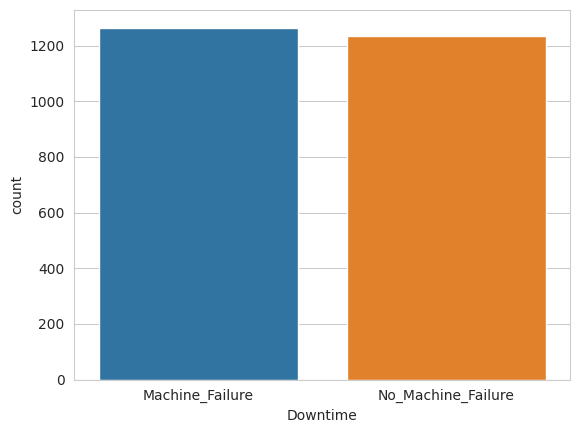

In [98]:
sns.set_style('whitegrid')
sns.countplot(x='Downtime',data=df)

<Axes: xlabel='Downtime', ylabel='count'>

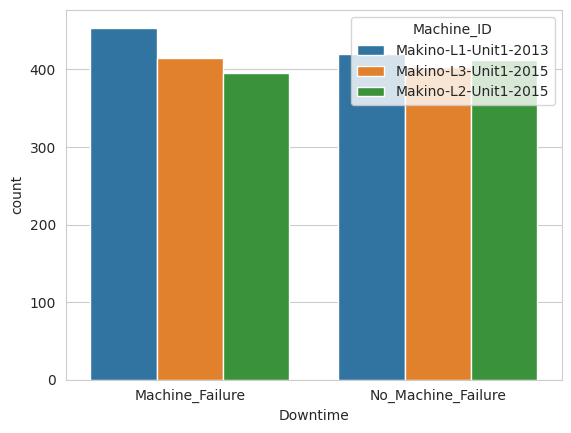

In [99]:
sns.set_style('whitegrid')
sns.countplot(x='Downtime',hue='Machine_ID',data=df)

<Axes: xlabel='Downtime', ylabel='count'>

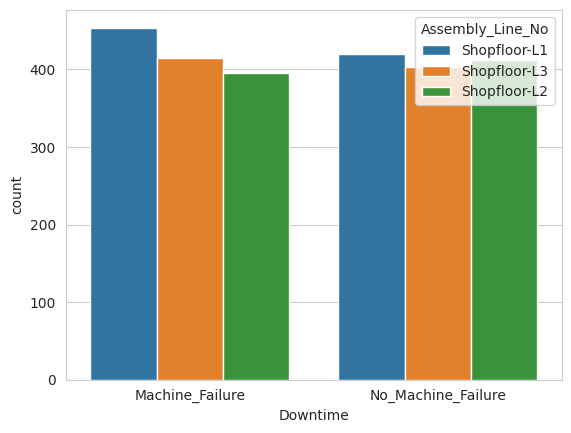

In [100]:
sns.set_style('whitegrid')
sns.countplot(x='Downtime',hue='Assembly_Line_No',data=df)

<Axes: xlabel='Downtime', ylabel='count'>

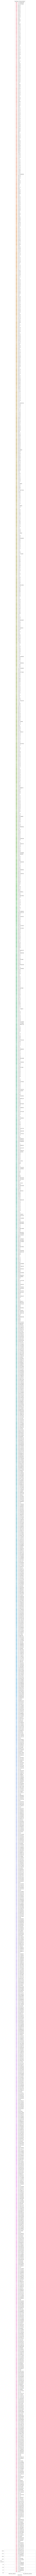

In [101]:
sns.set_style('whitegrid')
sns.countplot(x='Downtime',hue='Hydraulic_Pressure(bar)',data=df)

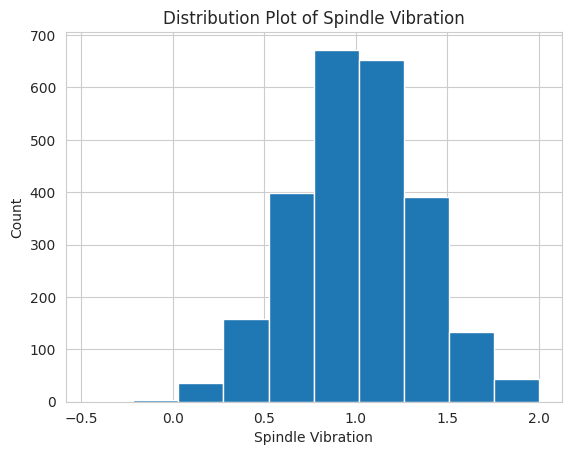

In [117]:
# Select the spindle vibration feature
spindle_vibration = df['Spindle_Vibration(Âµm)']

# Create the distribution plot
plt.hist(spindle_vibration)
plt.xlabel('Spindle Vibration')
plt.ylabel('Count')
plt.title('Distribution Plot of Spindle Vibration')
plt.show()

<ipython-input-106-39062020e54d>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Month'] = pd.to_datetime(df['Date']).dt.month
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


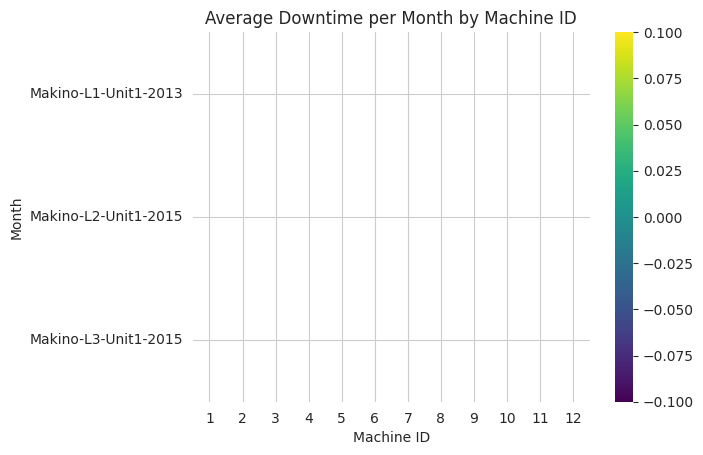

In [106]:
# Create the `Month` column if it does not exist
if 'Month' not in df.columns:
    df['Month'] = pd.to_datetime(df['Date']).dt.month

# Convert the `Downtime` column to a numeric type
df['Downtime'] = pd.to_numeric(df['Downtime'], errors='coerce')

# Calculate the average amount of downtime per month according to machine ID
df_average_downtime = df.groupby(['Machine_ID', 'Month'])['Downtime'].mean()

# Create a heatmap of the average downtime
sns.heatmap(df_average_downtime.unstack(), cmap='viridis', annot=True)
plt.title('Average Downtime per Month by Machine ID')
plt.xlabel('Machine ID')
plt.ylabel('Month')
plt.show()


<ipython-input-70-83f4d3bf34ef>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Month'] = pd.to_datetime(df['Date']).dt.month


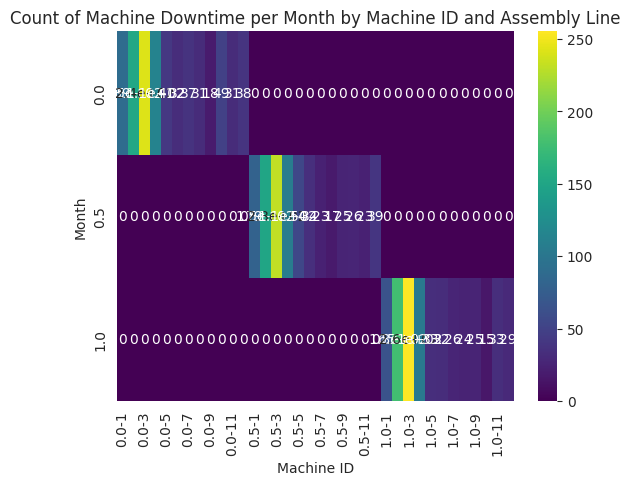

In [70]:
# Create the `Month` column if it does not exist
if 'Month' not in df.columns:
    df['Month'] = pd.to_datetime(df['Date']).dt.month

# Convert the `Downtime` column to a numeric type
df['Downtime'] = pd.to_numeric(df['Downtime'], errors='coerce')

# Calculate the count of machine downtime per month according to machine ID and assembly line
df_average_downtime = df.groupby(['Machine_ID', 'Month', 'Assembly_Line_No'])['Downtime'].count()

# Unstack the `df_average_downtime` DataFrame by both the `Machine_ID` and `Assembly_Line_No` columns
df_average_downtime = df_average_downtime.unstack(fill_value=0).unstack(fill_value=0)

# Create a heatmap of the average downtime
sns.heatmap(df_average_downtime, cmap='viridis', annot=True)
plt.title('Count of Machine Downtime per Month by Machine ID and Assembly Line')
plt.xlabel('Machine ID')
plt.ylabel('Month')
plt.show()


<ipython-input-103-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

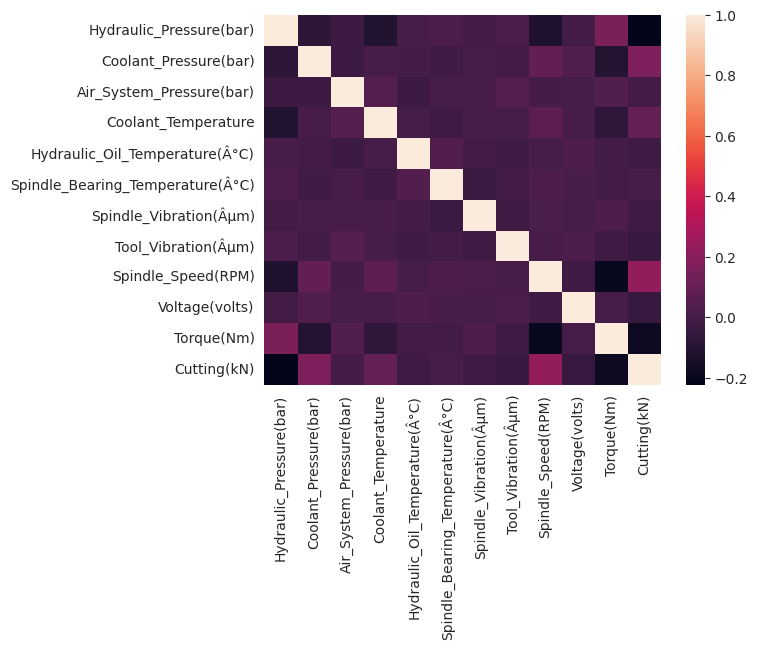

In [103]:
sns.heatmap(df.corr())